In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])
    

In [ ]:
def draw_sub_plots_line(axs,x_pos,y_pos,coef,intercept,mi,ma):
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    axs[x_pos,y_pos].plot(points[:,0],points[:,1])
    

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

In [ ]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c_para = [0.001,1,100]

In [ ]:
def task_func(sub_plots,ratios,C_parameters,clf):

    fig,axs = plt.subplots(sub_plots[0],sub_plots[1],figsize=(15,15))
    fig.tight_layout(pad=5.0)

    for j,i in enumerate(ratios):
        np.random.seed(1)
        
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))

        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)

        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        
        
        for idx,c in enumerate(C_parameters):
                       
            clf.set_params(C=c)
            clf.fit(X,y)
            
            axs[j,idx].scatter(X_p[:,0],X_p[:,1])
            axs[j,idx].scatter(X_n[:,0],X_n[:,1])
            
            draw_sub_plots_line(axs,j,idx,clf.coef_[0],clf.intercept_,X[:,1].min(),X[:,1].max())

            axs[j,idx].legend(["classifier","positive","negative"])
            axs[j,idx].set_title("ratio ="+str(i)+"C value = "+str(c))
            axs[j,idx].set(xlabel = "x_label",ylabel="y_label")
    plt.show()

## Task 1: Applying SVM

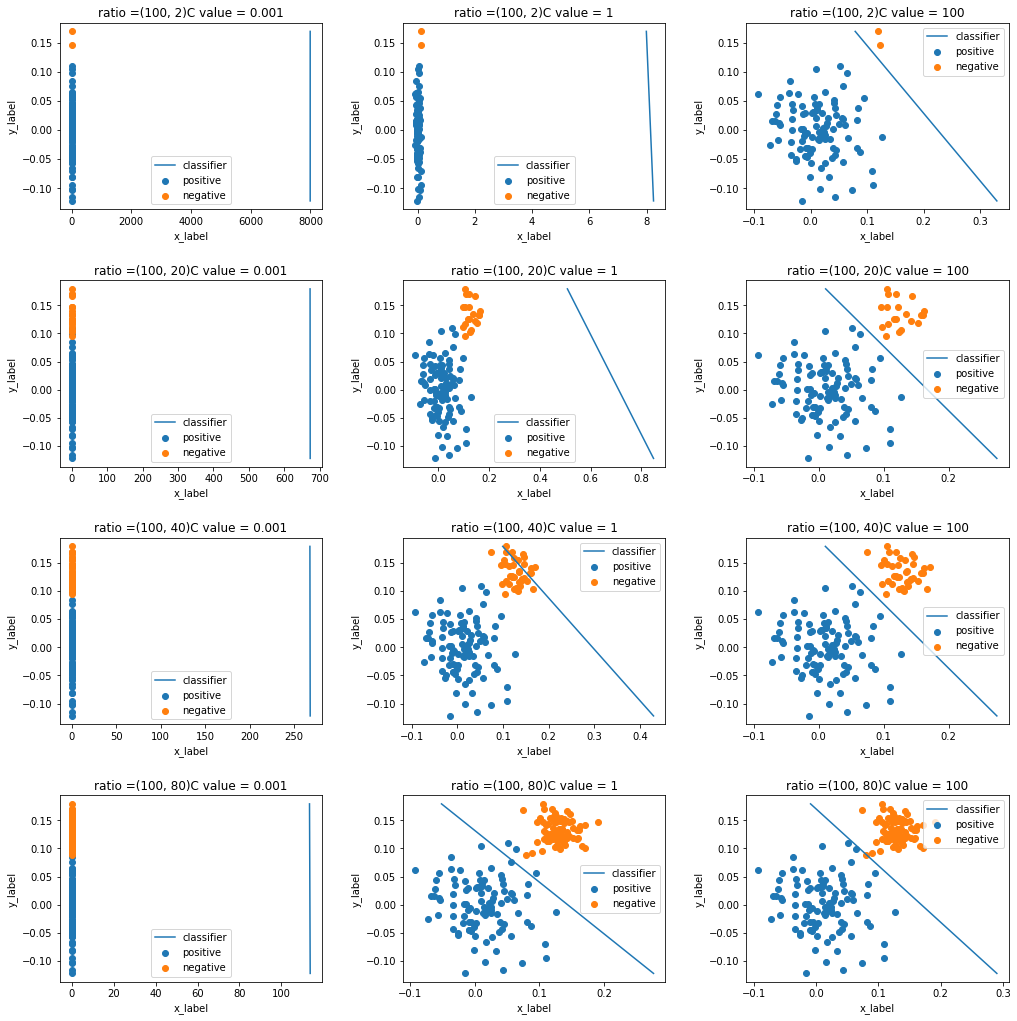

In [ ]:
clf = SVC(kernel='linear',random_state =14)
task_func((4,3),ratios,c_para,clf)
plt.show()

###Minimization problem
\begin{align}\begin{aligned}\min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\\begin{split}\textrm {subject to } & y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\
& \zeta_i \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}

###Observations:
C controls the pernalty of mis classification. 

1.C=0.001 
* If C is small we give less importance to wrongly classfied points. 
* Even though the points are incorrectly classified their zeta value will not effect the problem because of C.

*   Which results high bias, every point is classified as positive 
* Underfitting

2.C=1
* As number of negative points incrase the effect of sigma(zeta) minimization increases. So C=1 gives more importance to wrongly classified points compared to C=0.001. This minimizes zeta values so classification becomes more accurate.

* When there are less numbers of negative points, the sigma(zeta) value for points will be more negative and this dominates the sigma(zeta) for negative points resulting in biased outcome.
* As the number of negative points increases it becomes more accurate
* underfit for data sets(100,2),(100,20),(100,40)
* Fairly accurate for data set (100,80)


3.C=100
* More importance to wrongly classifed points.
* Fairly classfies data sets (100,2),(100,20),(100,40)
* we might say its overfit for (100,80) compared to when C=1
* Because the +ve points near the line might be outliers but still the classifeir gives importance to these points. And also there is no margin between +ve and -ve points. 








## Task 2: Applying LR

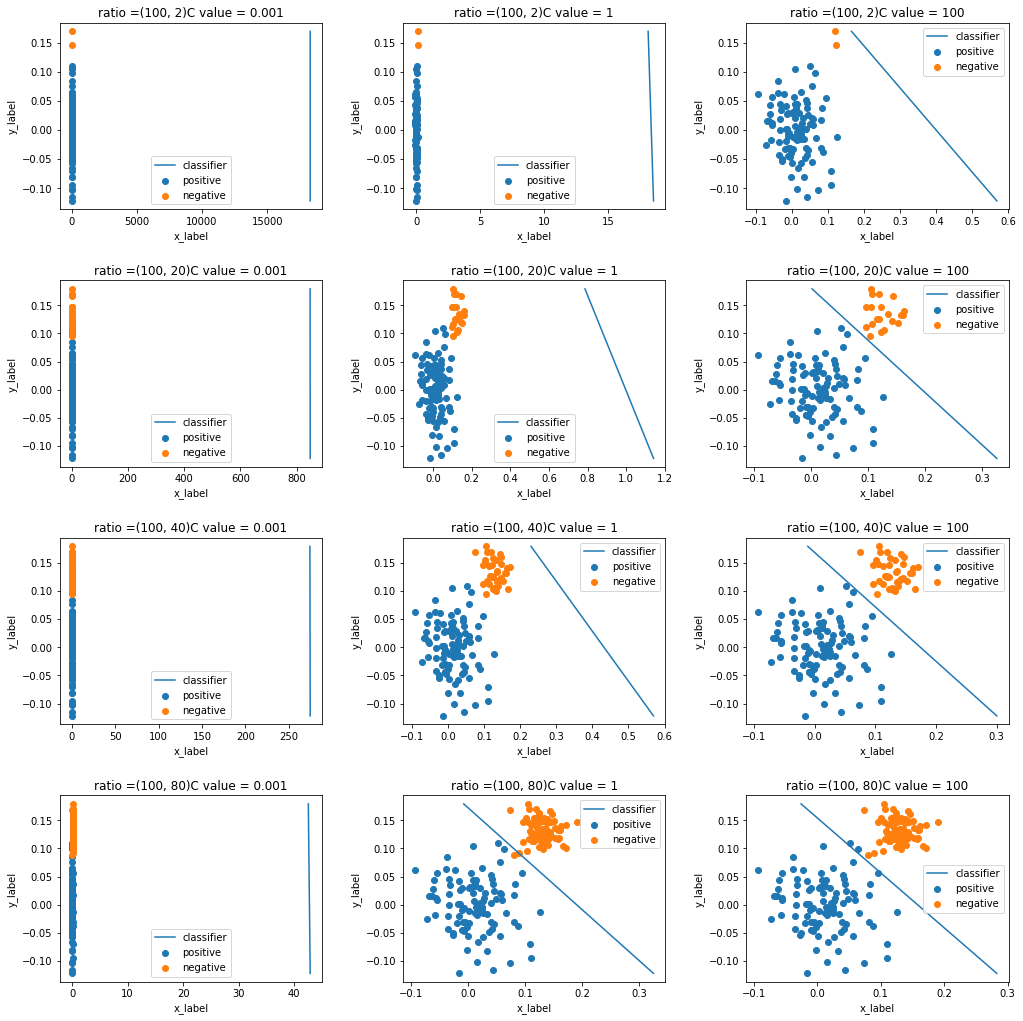

In [ ]:
clf = LogisticRegression(random_state= 34)
task_func((4,3),ratios,c_para,clf)

###Minimization problem
$\min_{w} C \sum_{i=1}^n \left(-y_i \log(\hat{p}(X_i)) - (1 - y_i) \log(1 - \hat{p}(X_i))\right) + r(w)$

$\hat{p}(X_i) = \operatorname{expit}(X_i w + w_0) = \frac{1}{1 + \exp(-X_i w - w_0)}.$

###Observations
1.C=0.001
* When C is small, loss term is ignored. So loss from wrongly calssifying negative points is ignored. So the classfication becomes biased.
* Underfitting
2.C=1
* Loss of wrongly classifying -ve points is dominated by loss of correctly classifying +ve points for data sets (100,2),(100,20),(100,40). They are biased classifications
* Comparing (100,40) plots from SVM and log_reg we can see that SVM classifier is better. This is because of hinge loss
* As number of -ve points inceases the loss term is less dominated by +ve points,so it becomes more accurate 
* Fairly accurate for data set (100,80)
3.C=100
* More importance to loss minimization.

* Compared to SVM underfit for (100,2)
* Fairly classifies (100,20),(100,40),(100,80)
* when we compare (100,80) of log_reg with SVM, it doesn't overfit because of sigmoid funtion.